In [ ]:
'''
ABC-XYZ Analysis

Что такое анализ ABC/XYZ?

Анализ ABC-XYZ — это метод, используемый в управлении запасами для классификации товаров на основе их важности и изменчивости спроса. 
Он сочетает в себе два отдельных метода: анализ ABC и анализ XYZ. 
ABC-XYZ-анализ — это метод группировки объектов планирования (характеристических комбинаций значений, SKU) на основе их стоимости (выручки или объема продаж) 
и динамики потребления или продаж. В ходе анализа объектам планирования присваивается один из классов ABC и XYZ одновременно.
'''

In [1]:
!pip install pandasql

import warnings
import pandas as pd
import numpy as np
from pandasql import sqldf

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26768 sha256=679de65c099e6c13f59d44c2d58c29aeef6564a37724eca9f7b0dd9721c640f5
  Stored in directory: c:\users\luther\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [2]:
order_products = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
print(f'order_products shape : {order_products.shape}')
print(f'orders         shape : {orders.shape}')

order_products shape : (112650, 7)
orders         shape : (99441, 8)


In [ ]:
'''
Понимание данных и предварительная обработка

обзор order_products
'''

In [3]:
sqldf("""
SELECT *
FROM order_products
LIMIT 5
""")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
'''
обзор orders
'''

In [4]:
sqldf("""
SELECT *
FROM orders
LIMIT 5
""")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
'''
Фильтруем доставленные заказы и фильтруем только необходимые столбцы
'''

In [5]:
orders = sqldf("""
SELECT order_id, date(order_delivered_customer_date) AS delivery_date
FROM orders
WHERE order_status = 'delivered' and delivery_date IS NOT NULL
""")
orders.head()

,order_id,delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16


In [ ]:
'''
отрегулируем order_products df и удалим ненужные поля
'''

In [6]:
order_products = sqldf("""
SELECT order_id,product_id, count(order_item_id) AS quantity, SUM(price) AS revenue
FROM order_products
GROUP BY 1,2
""")
order_products.head()

,order_id,product_id,quantity,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,199.90


In [7]:
order_details = sqldf("""
SELECT *, strftime('%Y-%m',delivery_date) AS year_month
FROM order_products OP
    JOIN orders O USING(order_id)
ORDER BY delivery_date
""")
order_details.head()

,order_id,product_id,quantity,revenue,delivery_date,year_month
0,36989eb07a0de2d3d3129eea35553875,43bb8825dd6838251606e5e4130cfff4,2,47.8,2016-10-11,2016-10
1,7033745709b7cf1bac7d2533663592de,35084deab9603bbb6035bb8638b1df89,1,93.9,2016-10-11,2016-10
2,0e556f5eafbf3eb399290101b183b10e,aafec8ef0f0e7bf2f2b811450df61818,2,49.8,2016-10-13,2016-10
3,31b0dd6152d2e471443debf037ae171d,473795a355d29305c3ea6b156833adf5,1,59.9,2016-10-13,2016-10
4,4eca6c2d172953276c75dd0e1bedce25,990ecadcf56234a68b3a0af8d01c0d8a,1,59.9,2016-10-13,2016-10


In [8]:
sqldf("""
SELECT distinct year_month
FROM order_details
order by year_month
""")

,year_month
0,2016-10
1,2016-11
2,2016-12
3,2017-01
4,2017-02
5,2017-03
6,2017-04
7,2017-05
8,2017-06
9,2017-07


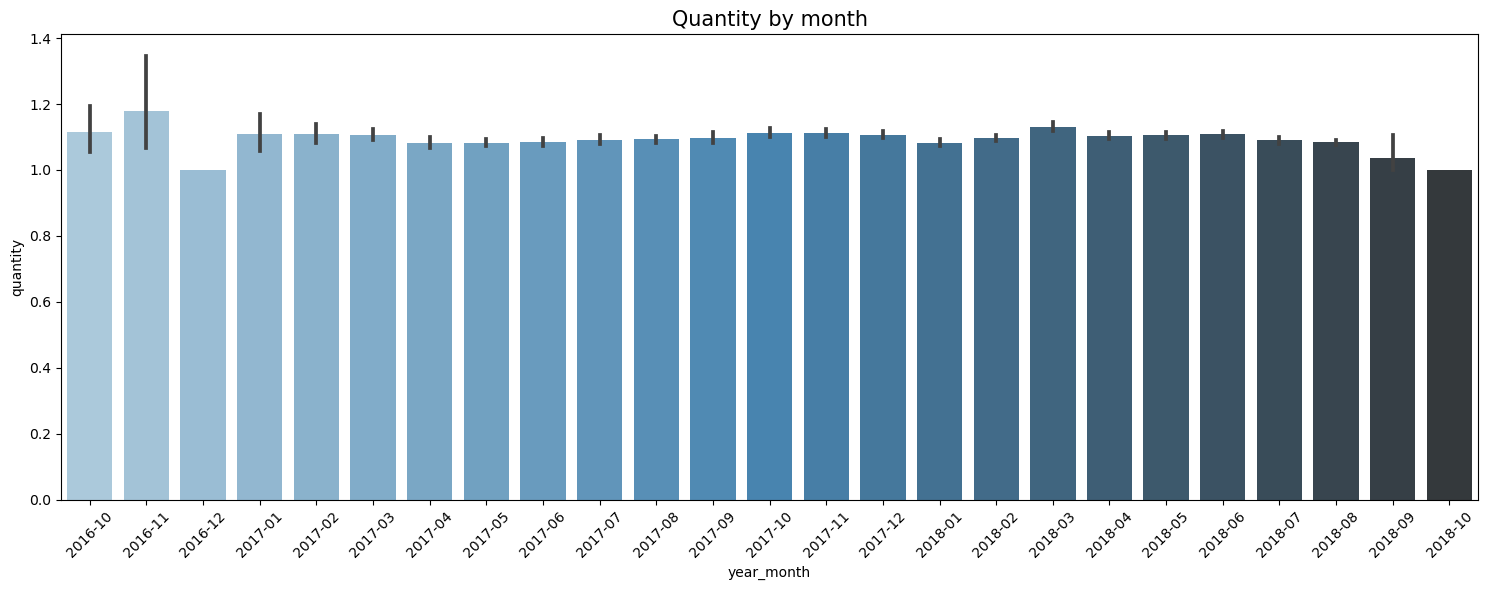

In [9]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", 
                 y="quantity", 
                 data=order_details,
                 palette="Blues_d")\
                .set_title("Quantity by month",fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

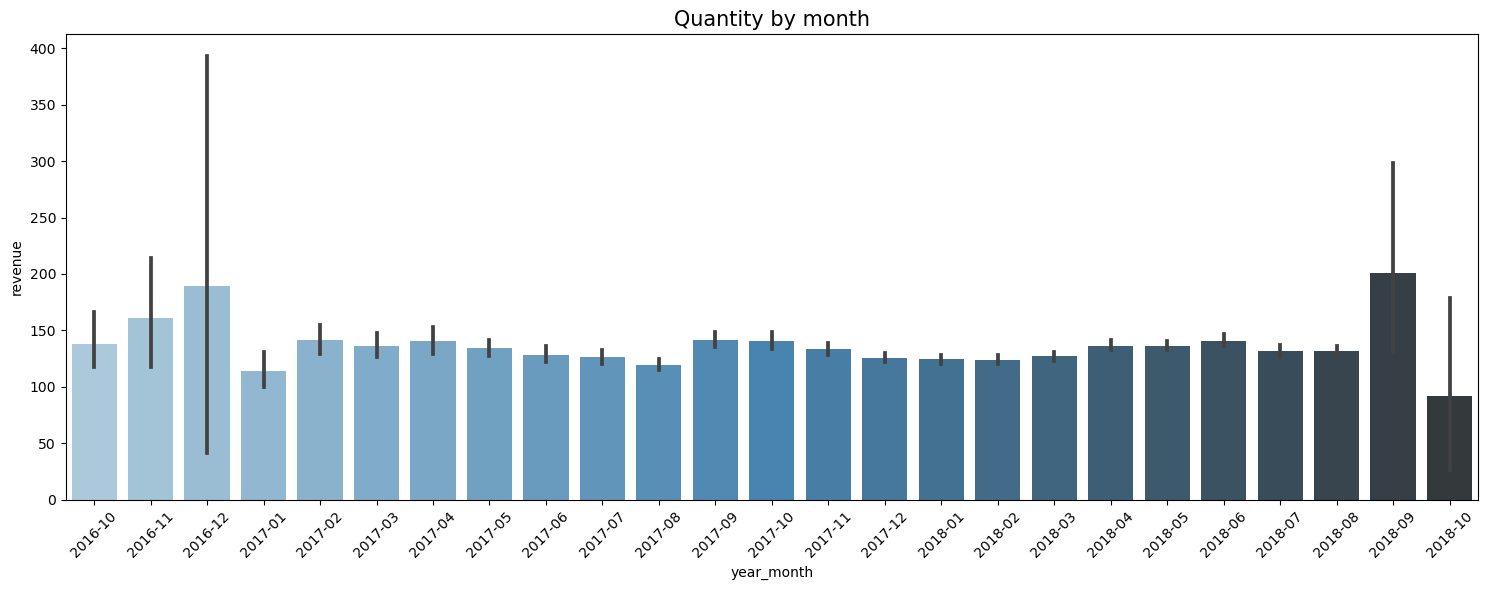

In [10]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", 
                 y="revenue", 
                 data=order_details,
                 palette="Blues_d")\
                .set_title("Quantity by month",fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
'''
Hаша следующая задача — переформатировать их для систематической организации ежемесячных данных для каждого Product_id в кадре данных Pandas. 
Первоначально мы будем использовать функцию groupby() для столбцов «product_id» и «year_month», создавая фрейм данных, который агрегирует сумму поля количества.
'''

In [11]:
product_quantity = sqldf("""
SELECT product_id, year_month, sum(quantity) AS quantity
FROM order_details
GROUP BY 1,2
""")
product_quantity.head()

,product_id,year_month,quantity
0,00066f42aeeb9f3007548bb9d3f33c38,2018-06,1
1,00088930e925c41fd95ebfe695fd2655,2017-12,1
2,0009406fd7479715e4bef61dd91f2462,2018-01,1
3,000b8f95fcb9e0096488278317764d19,2018-08,2
4,000d9be29b5207b54e86aa1b1ac54872,2018-04,1


In [12]:
prod_month_table = product_quantity.pivot(index='product_id', columns='year_month', values='quantity').reset_index().fillna(0)
prod_month_table.index.name = ''
prod_month_table.head()

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''
Проверим топ-5 продуктов
'''

In [13]:
top_5_prod = product_quantity.groupby('product_id').agg({'quantity':'sum'}).sort_values('quantity',ascending=False).head().index.tolist()
prod_month_table[prod_month_table['product_id'].isin(top_5_prod)]

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
,,,,,,,,,,,,,,,,,,,,,,,,,,
6925,368c6c730842d78016ad823897a372db,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,20.0,17.0,24.0,34.0,67.0,51.0,39.0,41.0,27.0,28.0,23.0,6.0,6.0,0.0,0.0
7205,389d119b48cf3043d311335e499d9c6b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,7.0,26.0,22.0,28.0,36.0,69.0,38.0,36.0,30.0,24.0,28.0,15.0,13.0,13.0,0.0,0.0
8428,422879e10f46682990de24d770e7f83d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,8.0,31.0,35.0,39.0,34.0,97.0,31.0,27.0,32.0,28.0,68.0,29.0,12.0,8.0,0.0,0.0
19289,99a4788cb24856965c36a24e339b6058,0.0,0.0,0.0,0.0,0.0,19.0,20.0,56.0,51.0,60.0,41.0,25.0,16.0,20.0,32.0,17.0,23.0,19.0,7.0,20.0,29.0,13.0,9.0,0.0,0.0
21615,aca2eb7d00ea1a7b8ebd4e68314663af,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,2.0,29.0,45.0,113.0,38.0,66.0,78.0,98.0,28.0,1.0,4.0,0.0,0.0


In [ ]:
'''
XYZ-сегментация
Рассчитаем стандартное отклонение и общий спрос
'''

In [14]:
prod_month_table['std_demand'] = prod_month_table.iloc[:,1:].std(axis=1) # стандартный спрос
prod_month_table['total_demand'] = prod_month_table.iloc[:,1:-1].sum(axis=1)
prod_month_table.head()

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand
,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,1.0
1,00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0
2,0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0
3,000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.4,2.0
4,000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0


In [ ]:
'''
Рассчитать средний спрос

У нас есть некоторый вариант здесь. По нашим наблюдениям, на большинство товаров ежемесячно нет заказов. Возможно, они не присутствуют в инвентаре регулярно или активны в течение определенного периода времени. Итак, как нам описать средний ежемесячный спрос? Вот наши некоторые варианты:

общий спрос / 25 (мы ищем продолжительность 25 месяцев)
Общий спрос / (последний месяц продажи - первый месяц продажи)
общая потребность / количество месяцев, отличных от нуля
Еще раз проверим квартили и пройдуемсяпо ним после получения результата.
'''

In [15]:
prod_month_table.describe([0.1,0.9])

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand
count,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.00000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000,32214.000000
mean,0.007481,0.002235,0.000124,0.010120,0.048581,0.08456,0.064320,0.130409,0.112994,0.122090,0.152108,0.139567,0.161886,0.168001,0.258242,0.230304,0.205594,0.246694,0.279351,0.253492,0.244831,0.204290,0.291333,0.001832,0.000093,0.407414,3.420531
std,0.111878,0.063487,0.011143,0.154678,0.373466,0.53707,0.429297,0.764174,0.712098,0.806733,0.866759,0.787567,0.843748,0.880688,1.441980,1.334902,1.106551,1.321441,1.280986,1.606860,1.101048,0.887531,1.230351,0.049488,0.009650,0.695197,10.584393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.723418,6.000000
max,6.000000,4.000000,1.000000,10.000000,22.000000,37.00000,20.000000,56.000000,51.000000,60.000000,49.000000,36.000000,39.000000,36.000000,97.000000,113.000000,47.000000,66.000000,78.000000,162.000000,42.000000,37.000000,86.000000,4.000000,1.000000,33.810748,520.000000


In [ ]:
'''
даже 0,90 процентиля равны 0 для большинства столбцов, поэтому используем option_3
'''

In [16]:
prod_month_table['avg_demand'] = prod_month_table['total_demand'] / 25
prod_month_table.tail(6)

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand,avg_demand
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32208,fff515ea94dbf35d54d256b3e39f0fea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.200000,1.0,0.04
32209,fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276887,2.0,0.08
32210,fff81cc3158d2725c0655ab9ba0f712c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.200000,1.0,0.04
32211,fff9553ac224cec9d15d49f5a263411f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04
32212,fffdb2d0ec8d6a61f0a0a0db3f25b441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.577350,5.0,0.20
32213,fffe9eeff12fcbd74a2f2b007dde0c58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04


In [ ]:
'''
Рассчитаем коэффициент вариации спроса
'''

In [17]:
prod_month_table['cov_demand'] = prod_month_table['std_demand'] / prod_month_table['avg_demand']
prod_month_table.tail()

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand,avg_demand,cov_demand
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32209,fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276887,2.0,0.08,3.461093
32210,fff81cc3158d2725c0655ab9ba0f712c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.200000,1.0,0.04,5.000000
32211,fff9553ac224cec9d15d49f5a263411f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000
32212,fffdb2d0ec8d6a61f0a0a0db3f25b441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.577350,5.0,0.20,2.886751
32213,fffe9eeff12fcbd74a2f2b007dde0c58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000


In [ ]:
'''
Значение, близкое к нулю, означает, что существует минимальная вариация и более высокая предсказуемость, тогда как высокие значения подразумевают обратное.
'''

In [18]:
prod_month_table.sort_values(by='cov_demand', ascending=False).head()

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand,avg_demand,cov_demand
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7109,37eb69aca8718e843d897aa7b82f462d,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,0.60,5.0
18430,92cba5857ead78ea248ac2f9ada31594,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.04,5.0
2247,1176fc831c22bd69f919a091f888fd65,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.04,5.0
17974,8ebd584f33b5fdca6428a5130d6e17d2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.04,5.0
6806,3572a945e47ca64e7796603040878145,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.04,5.0


In [19]:
prod_month_table.sort_values(by='cov_demand', ascending=True).head()

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand,avg_demand,cov_demand
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15138,777d2e438a1b645f3aec9bd57e92672c,0.0,0.0,0.0,1.0,5.0,6.0,2.0,9.0,10.0,2.0,7.0,6.0,4.0,2.0,5.0,6.0,2.0,7.0,1.0,6.0,5.0,5.0,1.0,0.0,0.0,3.023795,92.0,3.68,0.821683
13748,6cdd53843498f92890544667809f1595,0.0,0.0,0.0,3.0,8.0,2.0,1.0,2.0,4.0,1.0,5.0,6.0,10.0,7.0,13.0,7.0,16.0,11.0,14.0,8.0,14.0,8.0,12.0,1.0,0.0,5.134199,153.0,6.12,0.838921
6829,35afc973633aaeb6b877ff57b2793310,0.0,0.0,0.0,0.0,0.0,2.0,4.0,9.0,5.0,17.0,12.0,12.0,13.0,7.0,17.0,5.0,6.0,9.0,12.0,11.0,7.0,5.0,9.0,0.0,0.0,5.485739,162.0,6.48,0.846565
14608,7340a3839a1de1e99d149b8cf052a2ec,0.0,0.0,0.0,0.0,2.0,3.0,1.0,5.0,4.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,5.0,2.0,3.0,2.0,0.0,0.0,1.562050,44.0,1.76,0.887528
15726,7c1bd920dbdf22470b68bde975dd3ccf,0.0,0.0,0.0,0.0,3.0,10.0,6.0,11.0,21.0,13.0,22.0,23.0,20.0,11.0,23.0,7.0,5.0,15.0,11.0,7.0,5.0,4.0,3.0,0.0,0.0,7.963458,220.0,8.80,0.904938


Text(0.5, 1.0, 'Coefficient of Variation')

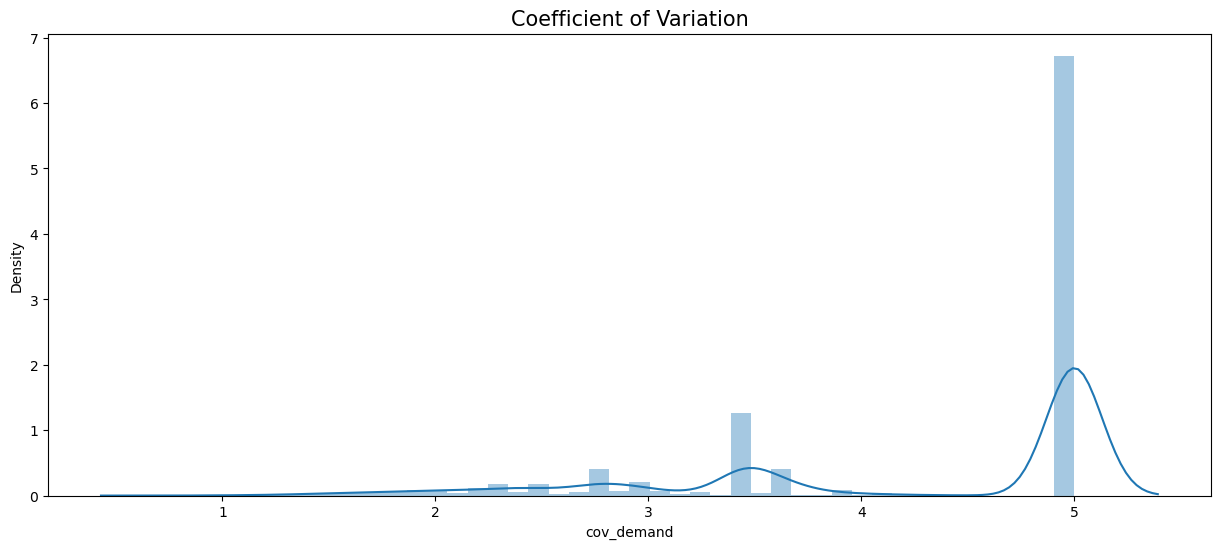

In [20]:
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(prod_month_table['cov_demand']).set_title("Coefficient of Variation",fontsize=15)

In [ ]:
'''
Назначим классы XYZ
'''

In [21]:
def xyz_classify_product(cov):
    """Примените классификацию XYZ к каждому продукту на основе его коэффициента вариации количества заказа.

    :param cov: Коэффициент вариации количества заказа для SKU
    :return: Класс классификации XYZ
    """

    if cov <= 0.5:
        return 'X'
    elif cov > 0.6 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [22]:
prod_month_table['xyz_class'] = prod_month_table['cov_demand'].apply(xyz_classify_product)
prod_month_table['xyz_class'].value_counts()

Z    32204
Y       10
Name: xyz_class, dtype: int64

In [23]:
prod_month_table['cov_demand'].min()

0.8216832950127971

In [24]:
prod_month_table.groupby('xyz_class').agg(
    total_skus=('product_id', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
Y,10,1736.0,6.355130,6.944000,0.911219
Z,32204,108453.0,0.405568,0.134707,4.276528


In [26]:
prod_month_table

year_month,product_id,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,std_demand,total_demand,avg_demand,cov_demand,xyz_class
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000,Z
1,00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000,Z
2,0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000,Z
3,000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.400000,2.0,0.08,5.000000,Z
4,000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32209,fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276887,2.0,0.08,3.461093,Z
32210,fff81cc3158d2725c0655ab9ba0f712c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.200000,1.0,0.04,5.000000,Z
32211,fff9553ac224cec9d15d49f5a263411f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,1.0,0.04,5.000000,Z


In [27]:
xyz_df = prod_month_table.groupby('xyz_class').agg('sum').drop(['std_demand','total_demand','avg_demand','cov_demand'],axis=1)
xyz_df

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
xyz_class,,,,,,,,,,,,,,,,,,,,,,,,,
Y,0.0,0.0,0.0,4.0,28.0,62.0,40.0,115.0,132.0,138.0,131.0,129.0,115.0,89.0,154.0,79.0,75.0,101.0,67.0,80.0,92.0,53.0,51.0,1.0,0.0
Z,241.0,72.0,4.0,322.0,1537.0,2662.0,2032.0,4086.0,3508.0,3795.0,4769.0,4367.0,5100.0,5323.0,8165.0,7340.0,6548.0,7846.0,8932.0,8086.0,7795.0,6528.0,9334.0,58.0,3.0


In [28]:
xyz_unstacked = xyz_df.unstack('xyz_class').to_frame()
xyz_unstacked = xyz_unstacked.reset_index().rename(columns={ 0: 'demand'})
xyz_unstacked.head()

,year_month,xyz_class,demand
0,2016-10,Y,0.0
1,2016-10,Z,241.0
2,2016-11,Y,0.0
3,2016-11,Z,72.0
4,2016-12,Y,0.0


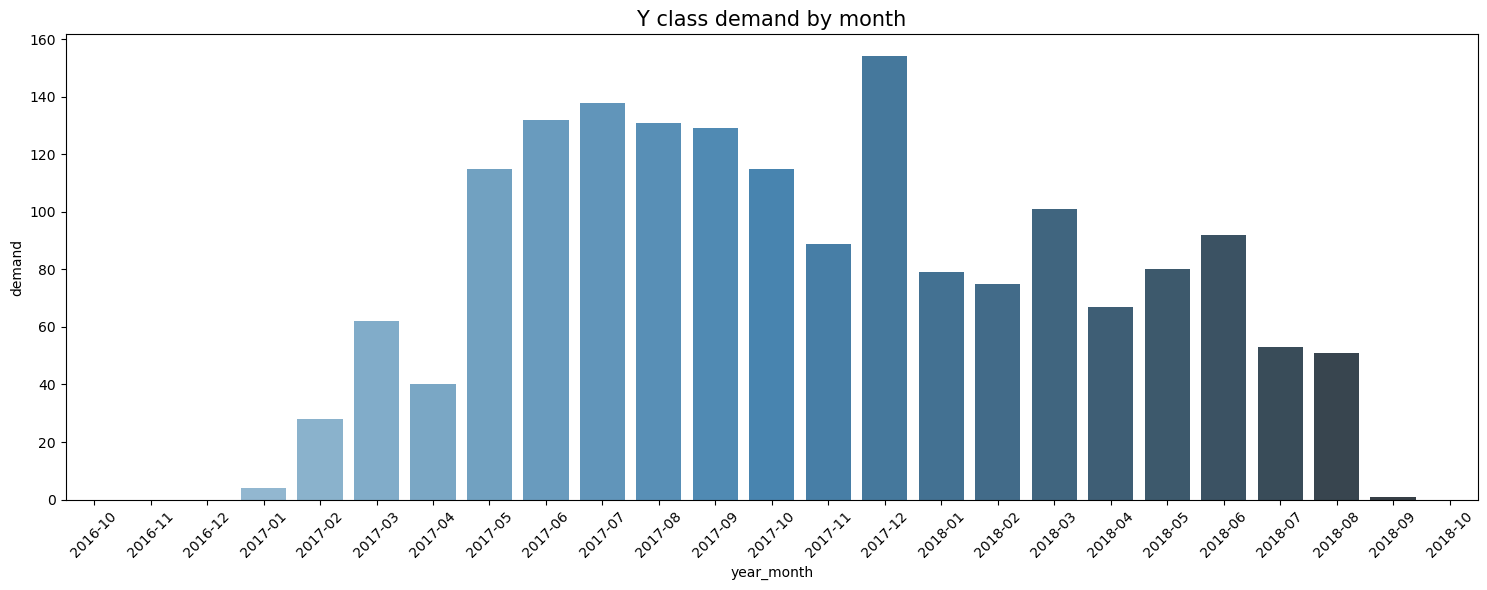

In [30]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", 
                 y="demand", 
                 data=xyz_unstacked[xyz_unstacked['xyz_class']=='Y'],
                 palette="Blues_d")\
                 .set_title("Y class demand by month",fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

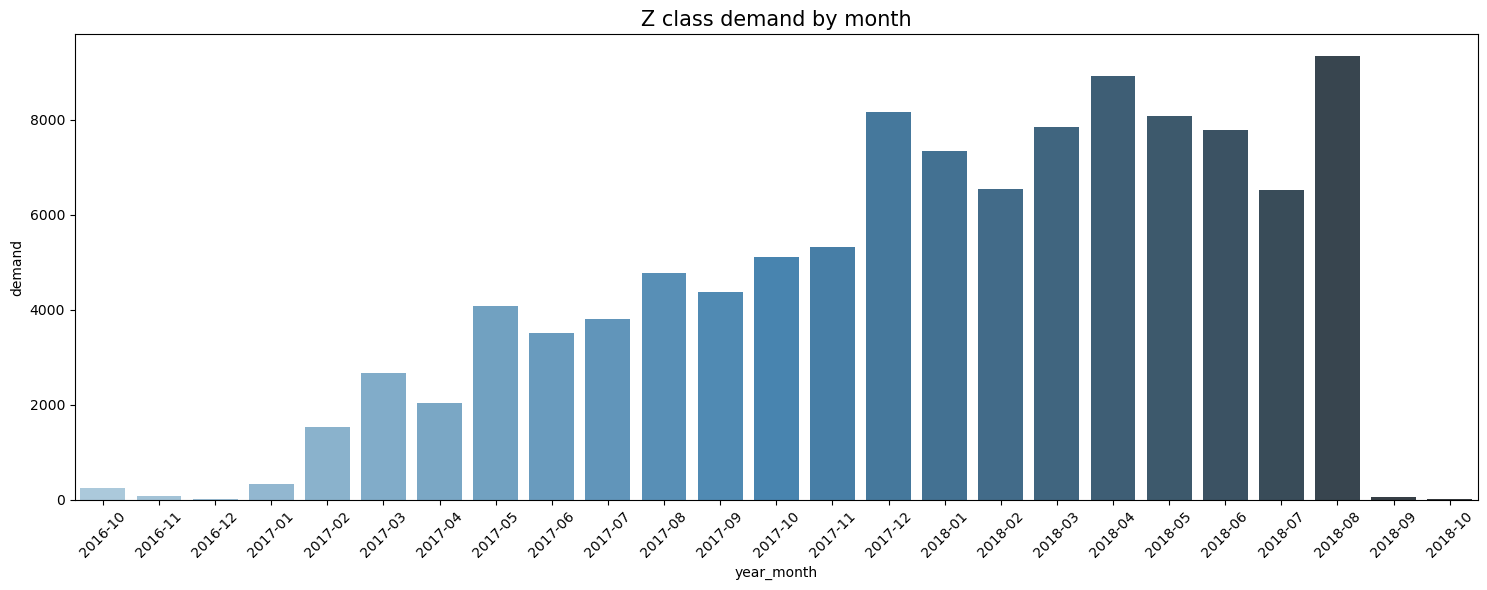

In [31]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", 
                 y="demand", 
                 data=xyz_unstacked[xyz_unstacked['xyz_class']=='Z'],
                 palette="Blues_d")\
                 .set_title("Z class demand by month",fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
'''
В то время как Z продолжает расти, Y имеет волнистый график.
'''

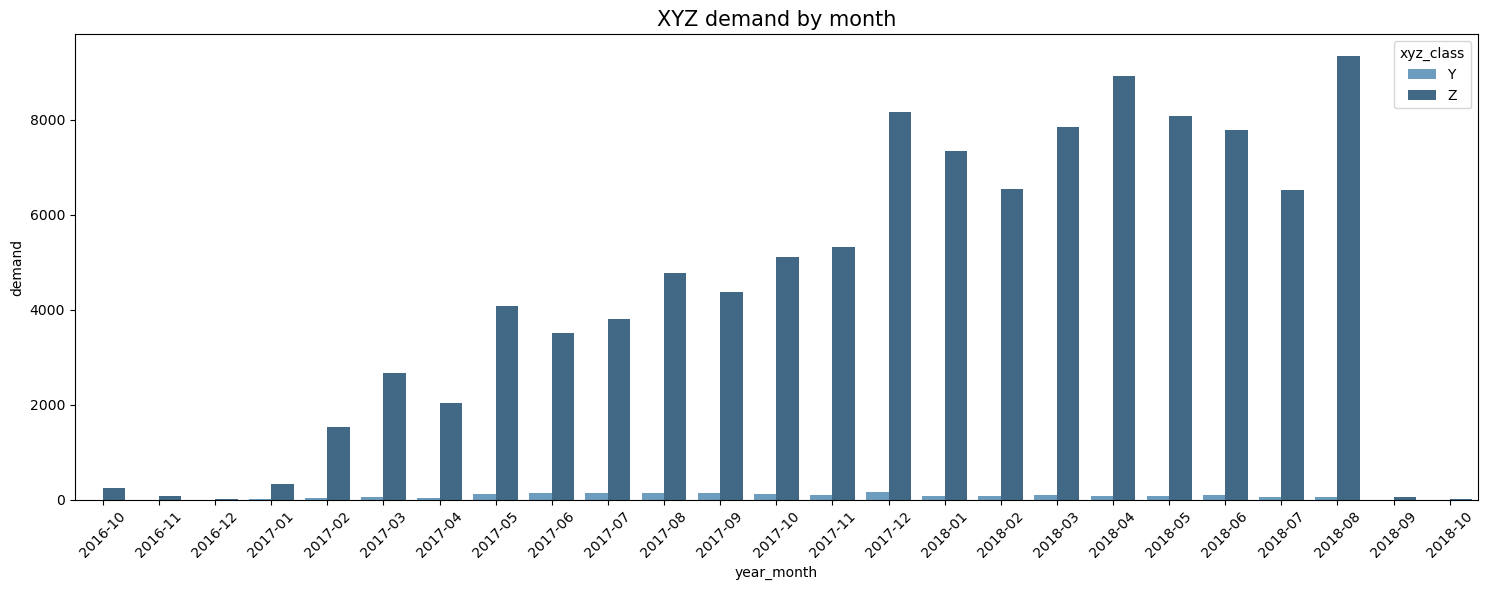

In [32]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="year_month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=xyz_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
'''
Анализ запасов ABC
Поскольку анализ XYZ учитывает исключительно спрос на единицу объема, следующим шагом будет проведение анализа запасов ABC, чтобы оценить влияние на доход каждого товара.
'''

In [33]:
prod_df  = sqldf("""
SELECT product_id, COUNT(DISTINCT product_id) AS unique_purchases, SUM(quantity) AS total_units, SUM(revenue) AS total_revenue
FROM order_details
GROUP BY 1
ORDER BY total_revenue DESC
""")
prod_df.head()

,product_id,unique_purchases,total_units,total_revenue
0,bb50f2e236e5eea0100680137654686c,1,194,63560.00
1,6cdd53843498f92890544667809f1595,1,153,53652.30
2,d6160fb7873f184099d9bc95e30376af,1,33,45949.35
3,d1c427060a0f73f6b889a5c7c61f2ac4,1,332,45620.56
4,99a4788cb24856965c36a24e339b6058,1,477,42049.66


In [34]:
prod_df['revenue_cumsum'] = prod_df['total_revenue'].cumsum()
prod_df['revenue_total'] = prod_df['total_revenue'].sum()
prod_df['revenue_running_percentage'] = (prod_df['revenue_cumsum'] / prod_df['revenue_total']) * 100
prod_df.head()

,product_id,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage
0,bb50f2e236e5eea0100680137654686c,1,194,63560.00,63560.00,13220248.93,0.480778
1,6cdd53843498f92890544667809f1595,1,153,53652.30,117212.30,13220248.93,0.886612
2,d6160fb7873f184099d9bc95e30376af,1,33,45949.35,163161.65,13220248.93,1.234180
3,d1c427060a0f73f6b889a5c7c61f2ac4,1,332,45620.56,208782.21,13220248.93,1.579261
4,99a4788cb24856965c36a24e339b6058,1,477,42049.66,250831.87,13220248.93,1.897331


In [35]:
def abc_classify_product(percentage):
    """Примените классификацию ABC к каждому продукту на основе его ранжированного процентного вклада в доход. 
    Любое разделение может быть использовано в соответствии с вашими данными.

    :param percentage: Текущий процент внесенного дохода
    :return: Классификация ABC
    """

    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 90:
        return 'B'
    else:
        return 'C'

In [ ]:
'''
Класс A: SKU, приносящие 80% выручки.
Класс B: следующие 10% дохода (теперь A+B составляет 90% от общего дохода)
Класс C: оставшиеся SKU приносят последние 10% выручки.
'''

In [36]:
prod_df['abc_class'] = prod_df['revenue_running_percentage'].apply(abc_classify_product)
prod_df['abc_rank'] = prod_df['revenue_running_percentage'].rank().astype(int)
prod_df.head()

,product_id,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,bb50f2e236e5eea0100680137654686c,1,194,63560.00,63560.00,13220248.93,0.480778,A,1
1,6cdd53843498f92890544667809f1595,1,153,53652.30,117212.30,13220248.93,0.886612,A,2
2,d6160fb7873f184099d9bc95e30376af,1,33,45949.35,163161.65,13220248.93,1.234180,A,3
3,d1c427060a0f73f6b889a5c7c61f2ac4,1,332,45620.56,208782.21,13220248.93,1.579261,A,4
4,99a4788cb24856965c36a24e339b6058,1,477,42049.66,250831.87,13220248.93,1.897331,A,5


In [37]:
abc_df = prod_df.groupby('abc_class').agg(
    total_skus=('product_id', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()
abc_df.head()

,abc_class,total_skus,total_units,total_revenue
0,A,8350,69081,10576044.83
1,B,5887,14515,1322052.53
2,C,17977,26593,1322151.57


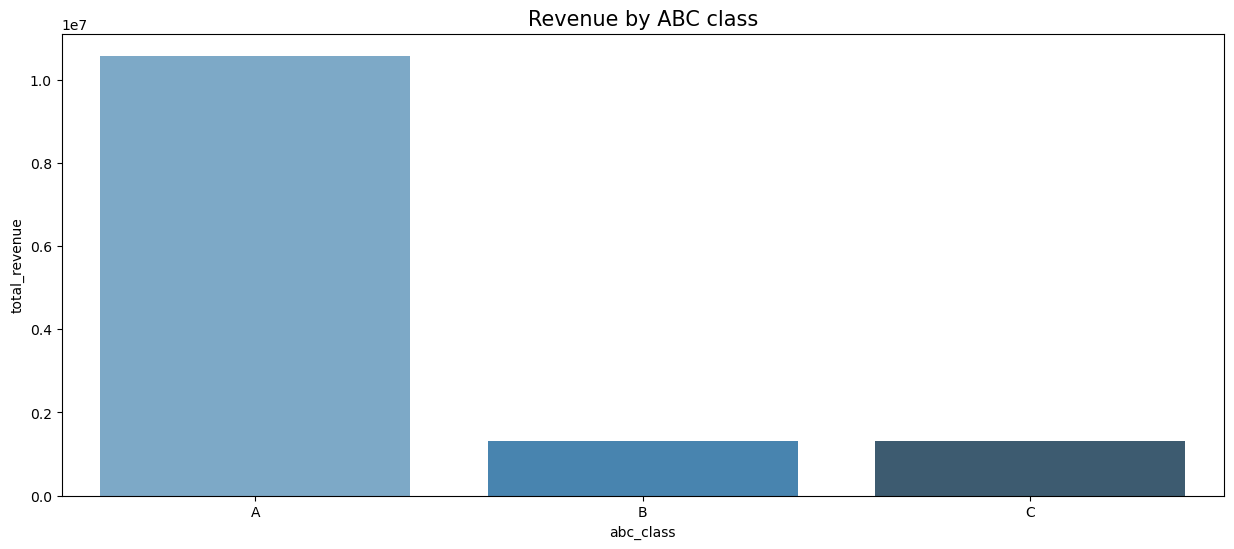

In [38]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_revenue", 
                 data=abc_df,
                 palette="Blues_d")\
                .set_title("Revenue by ABC class",fontsize=15)

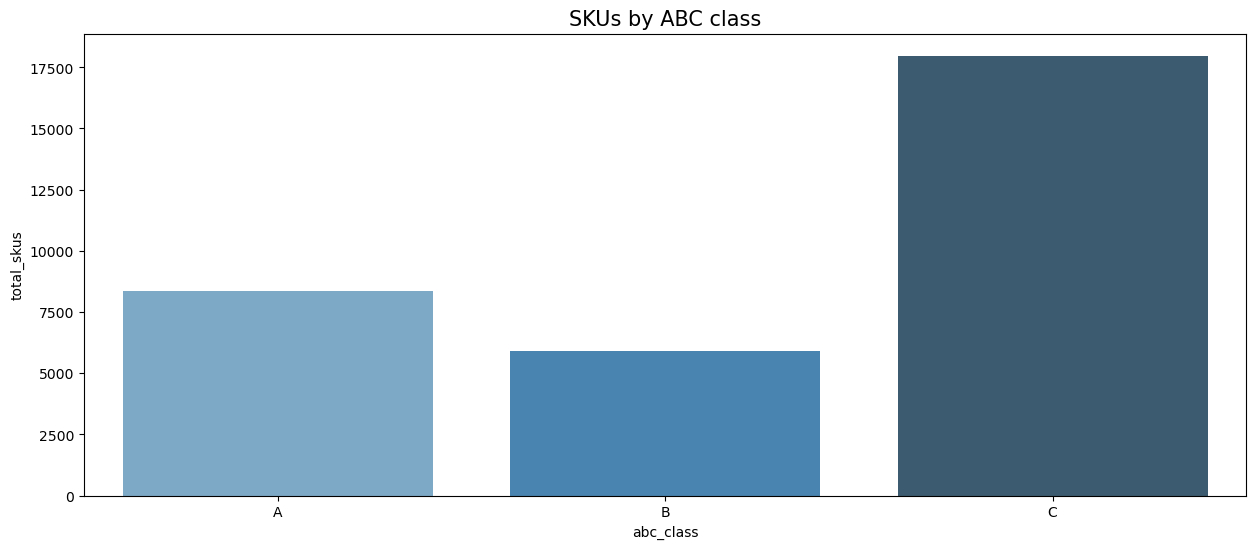

In [39]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_skus", 
                 data=abc_df,
                 palette="Blues_d")\
                .set_title("SKUs by ABC class",fontsize=15)

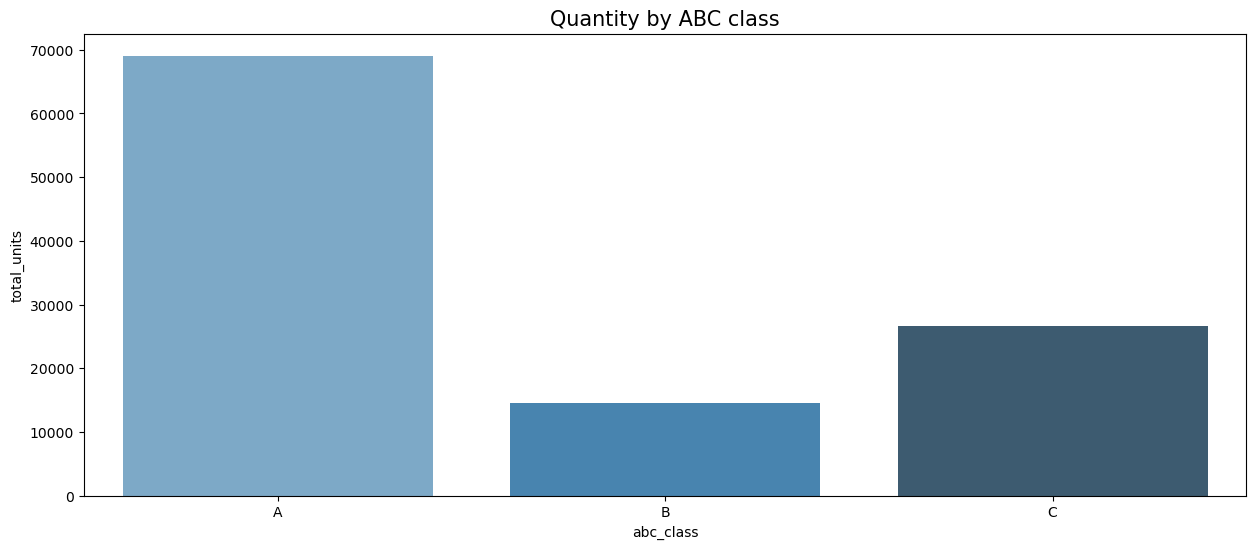

In [40]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class", 
                 y="total_units", 
                 data=abc_df,
                 palette="Blues_d")\
                .set_title("Quantity by ABC class",fontsize=15)

In [ ]:
'''
ABC-XYZ
'''

In [41]:
abc_df_final = prod_df[['product_id','abc_class','abc_rank','total_revenue']]
xyz_df_final = prod_month_table.copy()
xyz_df_final = xyz_df_final[['product_id','std_demand', 'total_demand', 'avg_demand','cov_demand', 'xyz_class']]
abc_xyz_df = abc_df_final.merge(xyz_df_final, on='product_id', how='left')
abc_xyz_df.head()

,product_id,abc_class,abc_rank,total_revenue,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,bb50f2e236e5eea0100680137654686c,A,1,63560.00,10.300809,194.0,7.76,1.327424,Z
1,6cdd53843498f92890544667809f1595,A,2,53652.30,5.134199,153.0,6.12,0.838921,Y
2,d6160fb7873f184099d9bc95e30376af,A,3,45949.35,4.836666,33.0,1.32,3.664141,Z
3,d1c427060a0f73f6b889a5c7c61f2ac4,A,4,45620.56,15.883744,332.0,13.28,1.196065,Z
4,99a4788cb24856965c36a24e339b6058,A,5,42049.66,17.913961,477.0,19.08,0.938887,Y


In [ ]:
'''
Создание класса ABC-XYZ
'''

In [42]:
abc_xyz_df['abc_xyz_class'] = abc_xyz_df['abc_class'].astype(str) + abc_xyz_df['xyz_class'].astype(str)
abc_xyz_df_summary = abc_xyz_df.groupby('abc_xyz_class').agg(
    total_skus=('product_id', 'nunique'),
    total_demand=('total_demand', 'sum'),
    avg_demand=('avg_demand', 'mean'),    
    total_revenue=('total_revenue', 'sum'),    
).reset_index()

abc_xyz_df_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_skus,total_demand,avg_demand,total_revenue
1,AZ,8340,67345.0,0.322998,10410249.75
3,CZ,17977,26593.0,0.059171,1322151.57
2,BZ,5887,14515.0,0.098624,1322052.53
0,AY,10,1736.0,6.944000,165795.08


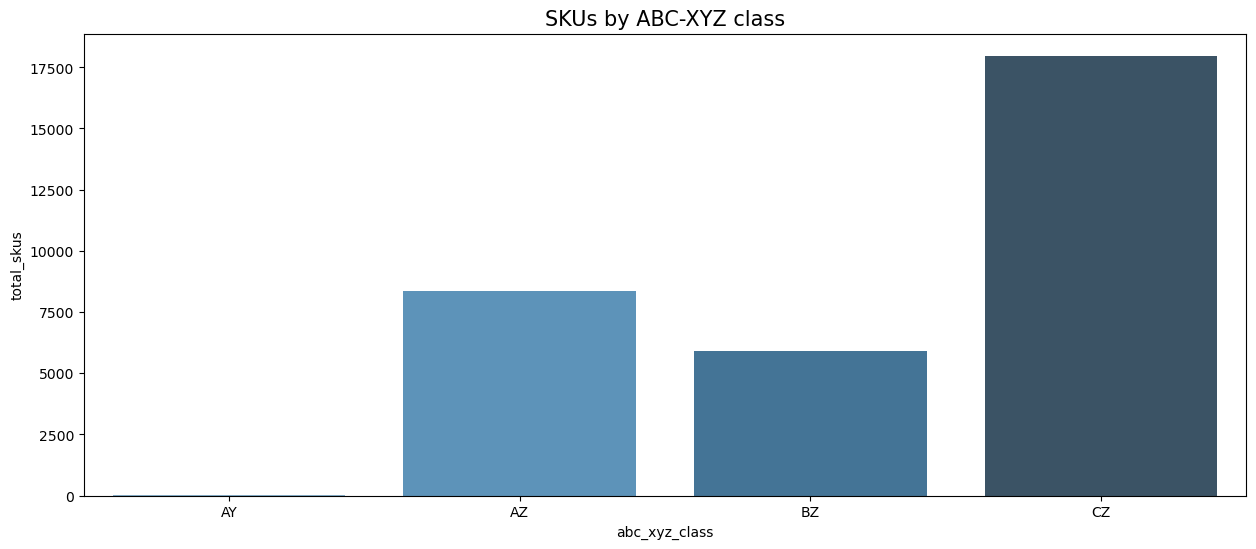

In [43]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_skus", 
                 data=abc_xyz_df_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)

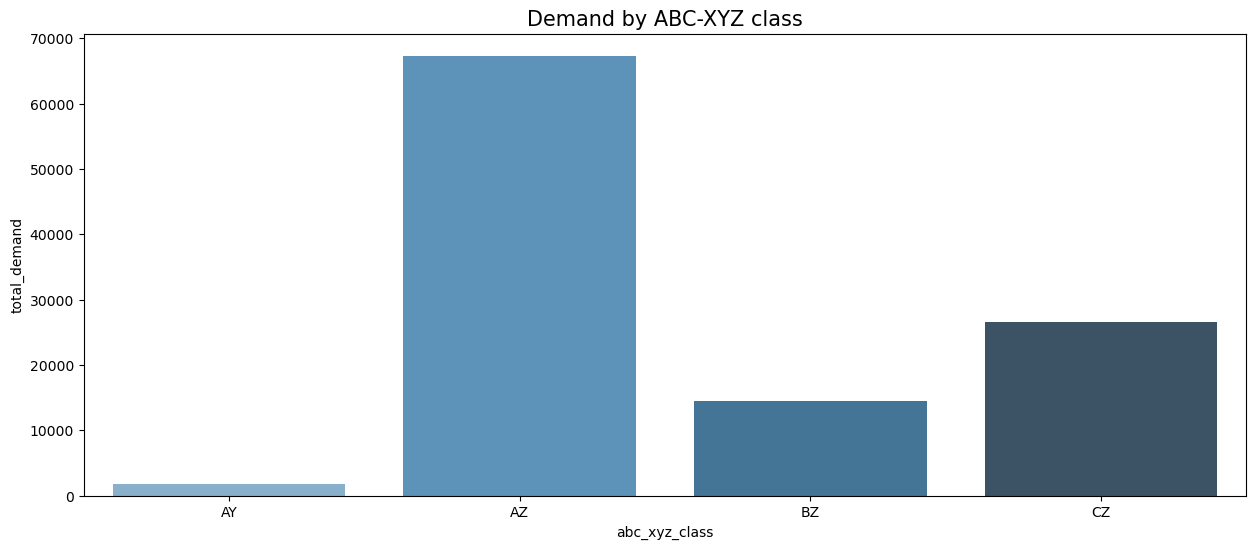

In [44]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=abc_xyz_df_summary, 
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)

In [ ]:
'''
Понимание классов ABC-XYZ

Oпределения классов ABC-XYZ:

AX
Высокая стоимость
Стабильный спрос
Легко прогнозировать
Легко управлять

BX
Среднее значение
Стабильный спрос
Легко прогнозировать
Легко управлять

CX
Низкая стоимость
Стабильный спрос
Легко прогнозировать
Легко управлять

AY
Высокая стоимость
Переменный спрос
Сложнее прогнозировать
Сложнее управлять

BY
Среднее значение
Переменный спрос
Сложнее прогнозировать
Сложнее управлять

CY
Низкая стоимость
Переменный спрос
Сложнее прогнозировать
Сложнее управлять

AZ
Высокая стоимость
Спорадический спрос
Трудно прогнозировать
Трудно управлять

BZ
Среднее значение
Спорадический спрос
Трудно прогнозировать
Трудно управлять

CZ
Низкая стоимость
Спорадический спрос
Трудно прогнозировать
Трудно управлять
'''